## Predicting calories with machine learning

### Introduction

In this notebook we will use machine learning and regression models to train and fit the data

### Dataset

The dataset is taken from Kaggle.com and composed of:
* Exercise Dataset
* Calories Dataset

### Objective

The objective is to determine the best regression model that can predict teh calories spent given input features.
The aim is to use `Scikit Library` and the models that come with it

In [1]:
#doing the imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
calories=pd.read_csv("./DATA/calories.csv")

In [3]:
exercise=pd.read_csv("./DATA/exercise.csv")

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [7]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [8]:
exercise['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

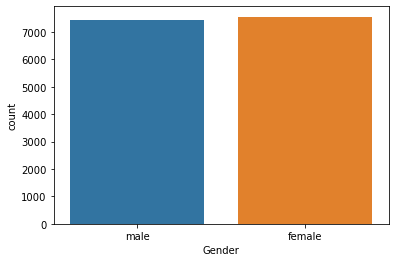

In [9]:
sns.countplot(x="Gender", data=exercise)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
label=LabelEncoder()

In [12]:
exercise["Gender"]=label.fit_transform(exercise["Gender"])

In [13]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8


In [14]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int32  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 879.0 KB


## Machine learning using following models:
* RandomForestRegressor
* Ridge
* Lasso

Metrics for Regression:
* R2 score
* RMS:Root mean squared
* MSE : Mean squared error

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import shuffle
# from Xgboost.sklearn import XGBRegressor

In [18]:
# pip install xgboost

In [19]:
scaler=MinMaxScaler()

In [20]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8


In [21]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [22]:
np.random.seed(42)

X=exercise.drop("User_ID", axis=1)
y=calories["Calories"]
X,y=shuffle(np.array(X), np.array(y))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

In [28]:

def fit_and_evaluate(models,X_train,y_train,X_test,y_test):

    """"
    fuction that gets model and data as input and then
    train the data, evaluate the data and gives score
    """
    model_scores={}
    for label,model in models.items():
        
        #fit the model to the data
        model.fit(X_train,y_train)

        # make predictions
        y_preds=model.predict(X_test)

        #evaluate the model
        metric_dict={"score":round(model.score(X_test,y_test),2),
                    "MAE": round(mean_absolute_error(y_test,y_preds),2),
                     "MSE":round(mean_squared_error(y_test,y_preds),2),
                     "r2":round(r2_score(y_test,y_preds),2)
                      }
        model_scores[label]=metric_dict
    return model_scores

In [29]:
models={"LR":LinearRegression(),
        "RFR": RandomForestRegressor(),
         "LS": Lasso(),
          "Rdg": Ridge(),
        "Elasic":ElasticNet()
        }

In [30]:
master_scores=fit_and_evaluate(models,X_train,y_train,X_test,y_test)

In [32]:
master_scores

{'LR': {'score': 0.97, 'MAE': 8.43, 'MSE': 132.48, 'r2': 0.97},
 'RFR': {'score': 1.0, 'MAE': 1.8, 'MSE': 9.36, 'r2': 1.0},
 'LS': {'score': 0.94, 'MAE': 10.8, 'MSE': 235.67, 'r2': 0.94},
 'Rdg': {'score': 0.97, 'MAE': 8.43, 'MSE': 132.81, 'r2': 0.97},
 'Elasic': {'score': 0.33, 'MAE': 43.68, 'MSE': 2686.96, 'r2': 0.33}}

In [33]:
df=pd.DataFrame(master_scores).T

In [34]:
df

,score,MAE,MSE,r2
LR,0.97,8.43,132.48,0.97
RFR,1.00,1.80,9.36,1.00
LS,0.94,10.80,235.67,0.94
Rdg,0.97,8.43,132.81,0.97
Elasic,0.33,43.68,2686.96,0.33


<AxesSubplot:ylabel='score'>

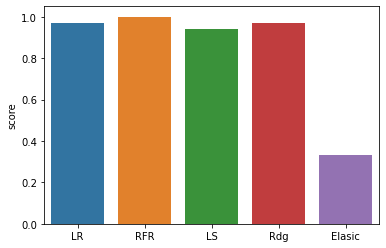

In [35]:
sns.barplot(x=df.index,y="score", data=df)

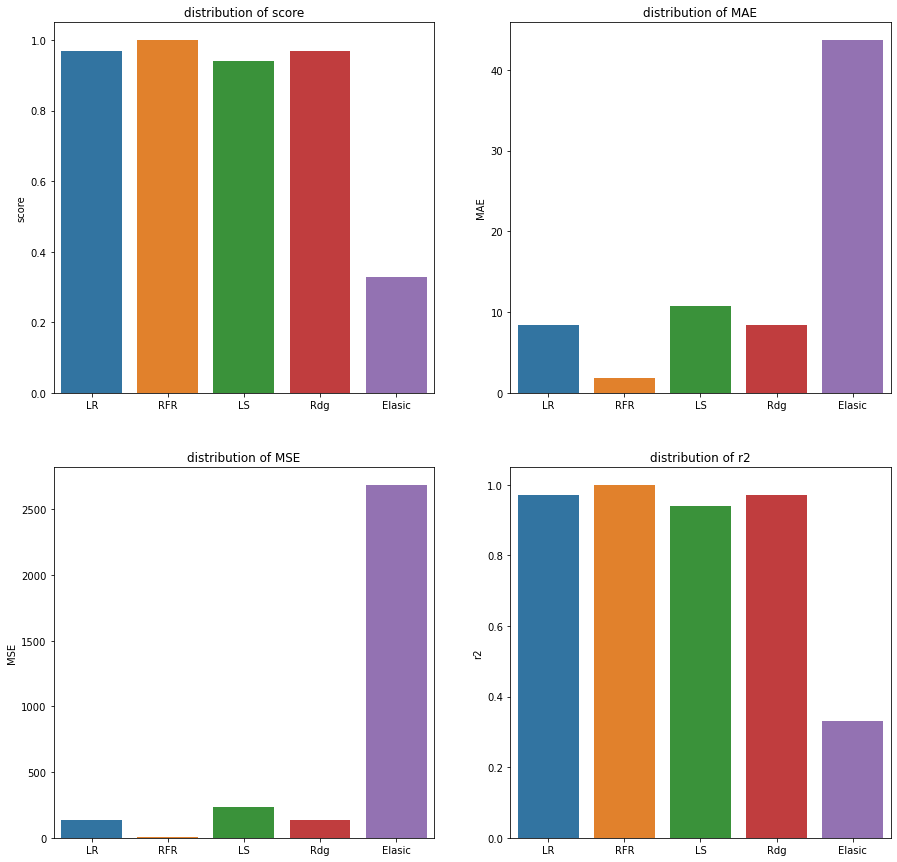

In [36]:
plt.figure(figsize=(15,15))

for i in range(4):
    axis=plt.subplot(2,2,i+1)
    sns.barplot(x=df.index,y=df.columns[i], data=df, ax=axis)
    plt.title(f"distribution of {df.columns[i]}")


## Using Cross validation fold

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
def cross_val(models,X,y,cv=5):
    cross_val_dict={}
    
    for label, model in models.items():
        np.random.seed(42)
        cv_r2=cross_val_score(model,X,y,cv=cv, scoring=None)
        cv_mae=cross_val_score(model,X,y, cv=cv, scoring="neg_mean_absolute_error")
        cv_mse=cross_val_score(model,X,y, cv=cv, scoring="neg_mean_squared_error")
        
        metric_dict={"r2 cross val score":np.mean(cv_r2),
                     "MAE val score":np.mean(cv_mae),
                      "MSE val score":np.mean(cv_mse)}
  
        cross_val_dict[label]=metric_dict
    
    return cross_val_dict
        

In [39]:
cross_val(models,X,y)

{'LR': {'r2 cross val score': 0.9671402283675838,
  'MAE val score': -8.355214811388189,
  'MSE val score': -128.05451449854593},
 'RFR': {'r2 cross val score': 0.9979000197826549,
  'MAE val score': -1.760888,
  'MSE val score': -8.145360673333332},
 'LS': {'r2 cross val score': 0.9643392772291873,
  'MAE val score': -8.770929172657262,
  'MSE val score': -138.97853388617713},
 'Rdg': {'r2 cross val score': 0.9671402242855421,
  'MAE val score': -8.355171234373802,
  'MSE val score': -128.05453371204604},
 'Elasic': {'r2 cross val score': 0.9604540259006681,
  'MAE val score': -9.345677345844543,
  'MSE val score': -154.11886023210337}}

In [40]:
models

{'LR': LinearRegression(),
 'RFR': RandomForestRegressor(),
 'LS': Lasso(),
 'Rdg': Ridge(),
 'Elasic': ElasticNet()}

In [44]:
best_model=models["RFR"]

In [45]:
best_model.feature_importances_

array([6.88431103e-03, 2.65311562e-02, 1.23169144e-03, 2.97267457e-03,
       9.14715674e-01, 4.71892168e-02, 4.75276426e-04])

In [46]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=22):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

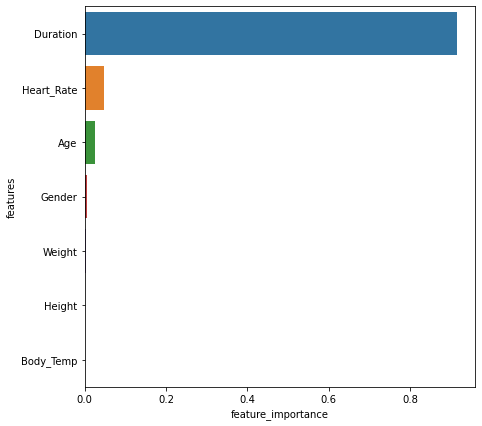

In [52]:
plt.figure(figsize=(7,7))
plot_features(exercise.drop(["User_ID"], axis=1).columns, best_model.feature_importances_)

## Conclusion

We can clearly see that the `RandomForestRegressor` is the best model to predict teh calories with a r2 Score of **1**